# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
from pprint import pprint
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
today = f"{datetime.datetime.now():%m/%d/%y}"
print (today)


04/30/22


In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

City_data = []

#query_url

In [19]:
print('Beginning Data Retrieval')     
print('-----------------------------')

record_count = 1
set_count = 1

#Loop Through all the cities 
for i, city in enumerate(cities):

    #Groupped cities in set of 50 for storing purpose 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Endpoint URL
    city_url = query_url + city

    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    record_count +=1

    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        City_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | korbach
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | carutapera
Processing Record 6 of Set 1 | yenagoa
Processing Record 7 of Set 1 | kieta
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | watsa
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | tarakan
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 17 of Set 1 | andenes
Processing Record 18 of Set 1 | daru
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | aksarka
Processing Record 21 of Set 1 | amparafaravola
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:

weather_data = pd.DataFrame(City_data)
weather_data.to_csv('WeatherPy_data.csv')
weather_data.count()

City          1097
Lat           1097
Lng           1097
Max Temp      1097
Humidity      1097
Cloudiness    1097
Wind Speed    1097
Country       1097
Date          1097
dtype: int64

In [ ]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,11.05,77,14,3.22,ZA,1651364678
1,castro,-24.7911,-50.0119,15.20,98,53,2.30,BR,1651364678
2,narsaq,60.9167,-46.0500,7.12,72,37,0.16,GL,1651364679
3,college,64.8569,-147.8028,12.77,31,40,8.23,US,1651364680
4,barrow,71.2906,-156.7887,-2.99,74,0,1.54,US,1651364558


In [ ]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1.097000e+03
mean,21.007109,23.468335,14.975606,72.408387,57.783045,3.392151,1.651365e+09
std,33.899625,88.750608,10.877827,21.200964,39.365617,2.299625,2.353221e+02
min,-54.800000,-175.200000,-15.860000,4.000000,0.000000,0.000000,1.651364e+09
25%,-7.844700,-53.461600,6.970000,64.000000,19.000000,1.570000,1.651365e+09
50%,25.700000,27.190700,16.340000,77.000000,73.000000,2.990000,1.651365e+09
75%,50.751000,102.533300,24.330000,88.000000,100.000000,4.630000,1.651365e+09
max,78.218600,179.316700,35.060000,100.000000,100.000000,11.830000,1.651365e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = weather_data[(weather_data["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,11.05,77,14,3.22,ZA,1651364678
1,castro,-24.7911,-50.0119,15.20,98,53,2.30,BR,1651364678
2,narsaq,60.9167,-46.0500,7.12,72,37,0.16,GL,1651364679
3,college,64.8569,-147.8028,12.77,31,40,8.23,US,1651364680
4,barrow,71.2906,-156.7887,-2.99,74,0,1.54,US,1651364558


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

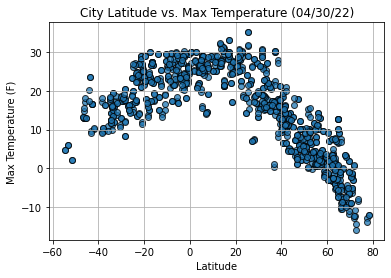

<Figure size 432x288 with 0 Axes>

In [31]:
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
plt.scatter(lats, max_temps, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()
plt.savefig("/Users/fennypatel/Desktop/HomeWork/06-Python-APIs/Instructions/output_data/max_temperature.png")

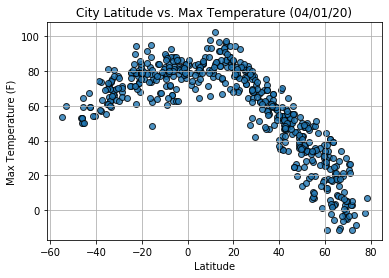

## Latitude vs. Humidity Plot

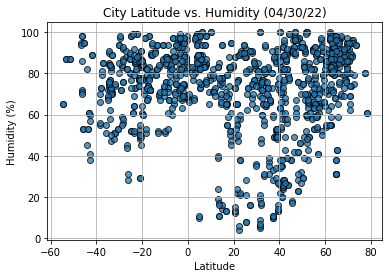

<Figure size 432x288 with 0 Axes>

In [32]:
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

Humidity = clean_city_data["Humidity"]
plt.scatter(lats, Humidity, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()
plt.savefig("/Users/fennypatel/Desktop/HomeWork/06-Python-APIs/Instructions/output_data/humidity.png")

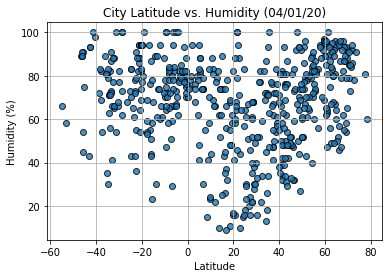

## Latitude vs. Cloudiness Plot

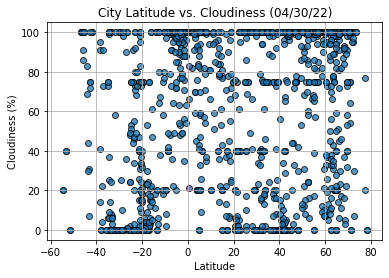

<Figure size 432x288 with 0 Axes>

In [33]:
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

Cloudiness = clean_city_data["Cloudiness"]
plt.scatter(lats, Cloudiness, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()
plt.savefig("/Users/fennypatel/Desktop/HomeWork/06-Python-APIs/Instructions/output_data/Cloudiness.png")

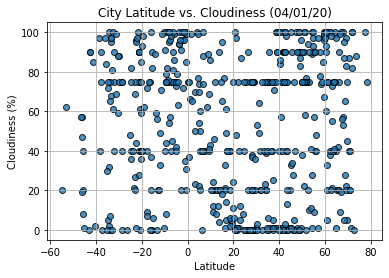

## Latitude vs. Wind Speed Plot

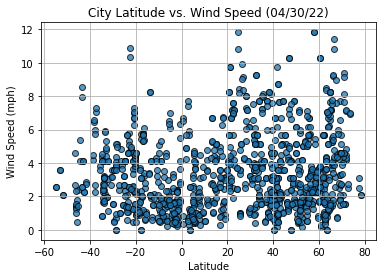

<Figure size 432x288 with 0 Axes>

In [35]:
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

Wind_Speed = clean_city_data["Wind Speed"]
plt.scatter(lats, Wind_Speed, alpha=.75, edgecolors="k")
plt.grid()
plt.show()
plt.savefig("/Users/fennypatel/Desktop/HomeWork/06-Python-APIs/Instructions/output_data/Wind_Speed.png")

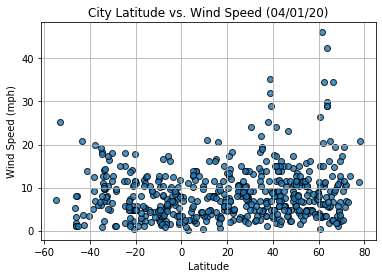

## Linear Regression

In [38]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")


In [39]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data.loc[(weather_data["Lat"] >= 0)]
southern_hemi_df = weather_data.loc[(weather_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7935673776124578


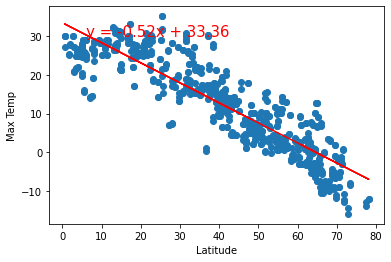

In [42]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.46937863826630627


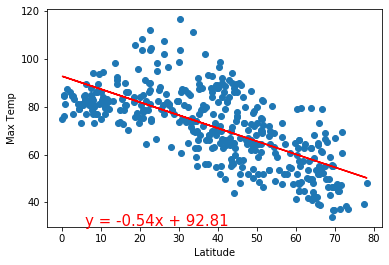

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.48808412099016396


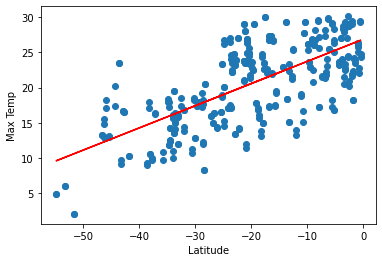

In [43]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The r-value is: 0.6082708688906918


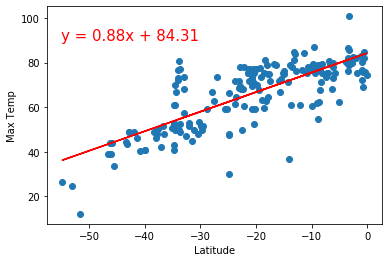

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.016312838371310055


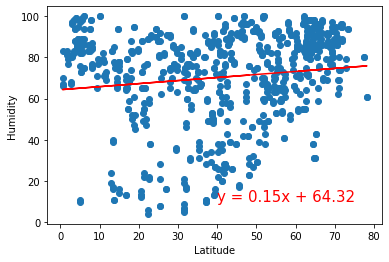

In [44]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.000543987878808455


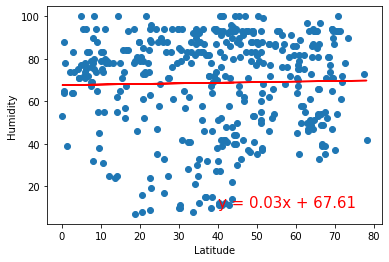

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04935803353923866


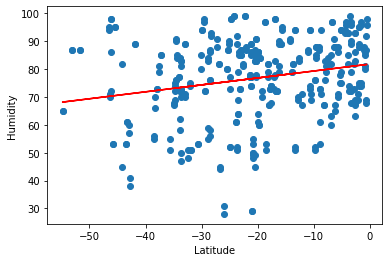

In [45]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The r-value is: 0.014985174297345524


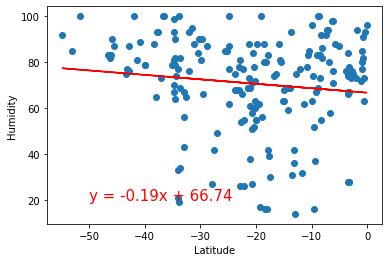

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.008958423637880108


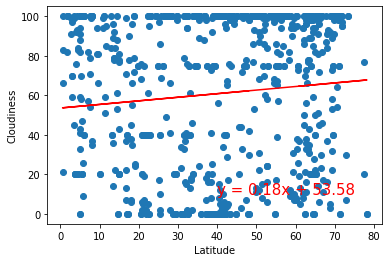

In [46]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10)) 

The r-value is: 0.0020898727664228514


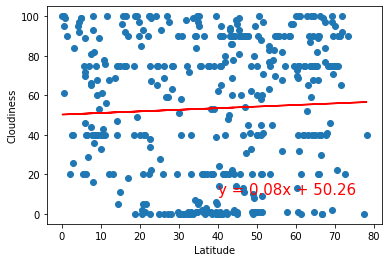

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0778691134795025


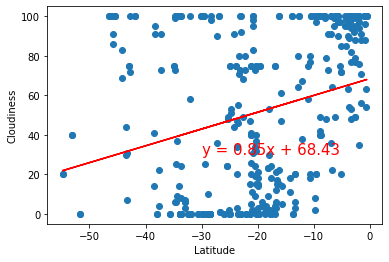

In [47]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The r-value is: 0.0035263772085582894


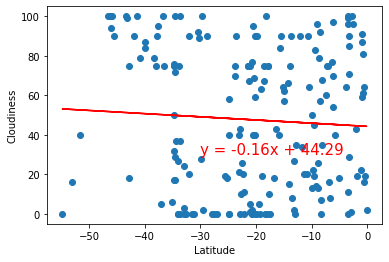

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.010704497071018598


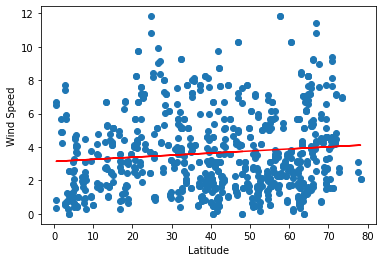

In [48]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.04019723576144484


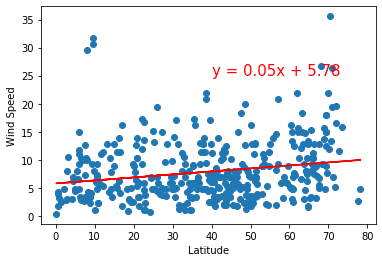

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05223887186868488


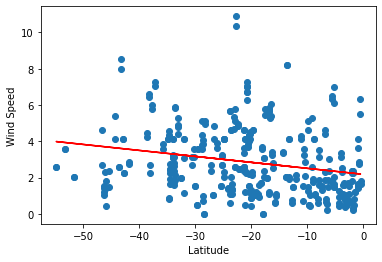

In [49]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The r-value is: 0.017128274759839232


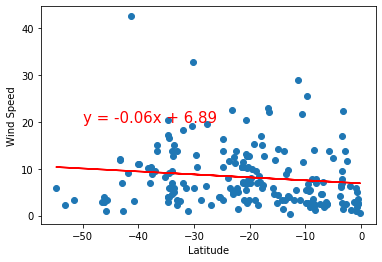